In [1]:
# Import the packages
# Read the data
# seperate cat and num columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
visa_df=pd.read_csv(r'C:\Users\saikrishna\Documents\Narashit\python\database\pythonDatafiles\Visadataset.csv')
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

**non outliers data**

In [14]:
wage_data=visa_df['prevailing_wage']
q1=round(np.quantile(wage_data,0.25),2)
q3=round(np.quantile(wage_data,0.75),2)
# q1,q3
IQR=q3-q1
# IQR
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=visa_df['prevailing_wage']>lb
con2=visa_df['prevailing_wage']<ub
con3=con1&con2
count=len(visa_df[con3])
non_outliers_data=visa_df[con3]
non_outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**how to treat outliers**

**method-1: Drop the outliers**
- if outliers has less than 2% of total data we can drop the outliers
- drop the outliers is not a recommended approach
- if we drop the outliers other columns data also drop
- we encounter a sistuation that loose the data

**method-2: Fill the median**
- we already know that outliers daes not affect by median
- so it is always a good approach fill the outliers with median

**method-3:cap the outliers**
- insted of the outliers with median, we can fill wit q3 and q1
    

In [ ]:
# step-1: lb ans ub
# step-2: calculate median
# step-3: new data=[]
# step-4: iterate each value from pwage
# step-5: if that value <lb or >ub
# step-6: new_data.append(median)
# step-7: else:
# step-8:    new_data.append(value)
# step-9: visa_df['pwage']=new_data

In [17]:
wage_data=visa_df['prevailing_wage']
q1=round(np.quantile(wage_data,0.25),2)
q3=round(np.quantile(wage_data,0.75),2)
# q1,q3
IQR=q3-q1
# IQR
lb=q1-1.5*IQR
ub=q3+1.5*IQR
median=wage_data.median()
new_data=[]
for i in wage_data:
    if i<lb or i>ub:
        new_data.append(median)
    else:
        new_data.append(i)
visa_df['pwage' ]=new_data

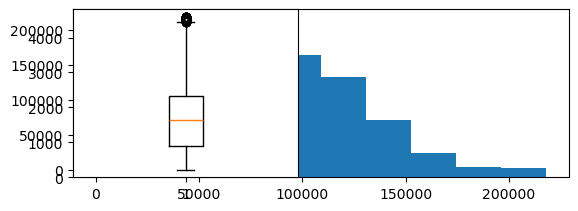

In [19]:
plt.subplot(2,1,1).hist(visa_df['pwage'])
plt.subplot(2,2,1).boxplot(visa_df['pwage'])
plt.show()

**np.where**
- np.where is a method to do if-else task in single line
- np.where(condition,TrueValue,Falsevalue)
- it take 3 arguments
    - condition
    - if coundition is True then it take True Value
    - if coundition is False then it take False Value

In [23]:
new_data=[]
for i in wage_data:
    if i<lb or i>ub:
      new_data.append(median)
    else:
      new_data.append(i)
visa_df['pwage']=new_data

In [25]:
dict1={'Marks':[100,200,300,400],
'Sub':['DS','DE','CS','IOT']}
df=pd.DataFrame(dict1)
df

,Marks,Sub
0,100,DS
1,200,DE
2,300,CS
3,400,IOT


In [ ]:
# I want replace the Marks=1 which are having >200
# Marks
# 100
# 200
# 1
# 1

In [27]:
con=df['Marks']>200
true=1
false=df['Marks']
df['new']=np.where(con,true,false)
df

,Marks,Sub,new
0,100,DS,100
1,200,DE,200
2,300,CS,1
3,400,IOT,1


In [29]:
wage_data=visa_df['prevailing_wage']
q1=round(np.quantile(wage_data,0.25),2)
q3=round(np.quantile(wage_data,0.75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
median=wage_data.median()
# replace the outliers with median using np.where
con=(visa_df['prevailing_wage']<lb) | (visa_df['prevailing_wage']>ub)
true=median
false=visa_df['prevailing_wage']
visa_df['p_wage_1']=np.where(con,true,false)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f83f465dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f83f4663f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f83d953b90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f83f466840>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f83f466b10>],
 'means': []}

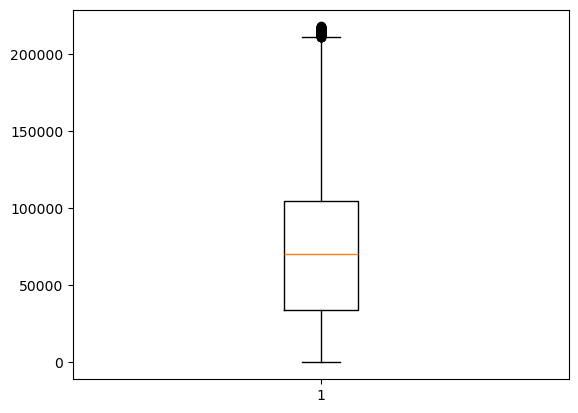

In [31]:
plt.boxplot(visa_df['p_wage_1'])